# Politic_ES

Análisis inicial de los datos

## Imports

In [97]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Visualización

In [124]:
%matplotlib inline

c_gender = {'male': 'blue', 'female': 'pink'}
c_profession = {'politician': 'gray', 'celebrity': 'yellow', 'journalist': 'orange'}
c_i_bin = {'left': 'red', 'right': 'blue'}
c_i_mul = {'left': 'red', 'moderate_left': 'lightcoral', 'moderate_right': 'turquoise', 'right': 'blue'}

## Seed para repetición

In [99]:
seed = 69420
np.random.seed(seed)

## Dataset

In [100]:
df = pd.read_csv(os.path.join("practise_data", "politicES_phase_2_train_public.csv"))
df

,label,gender,profession,ideology_binary,ideology_multiclass,tweet
0,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,¡Feliz 28 de febrero a todas las andaluzas y a...
1,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,"Feliz año nuevo, feliz esperanza 💕. Querido 20..."
2,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,🇩🇪🇪🇸 ¡Un placer encontrarme con mi homólogo al...
3,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,El conflicto en Ucrania ha supuesto una dramát...
4,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,La Academia de la Llingua Asturiana realiza un...
...,...,...,...,...,...,...
179995,ffd89e81d6f6c783bfb72a4590db4304,male,politician,left,left,Desde un inicio nos opusimos a la escalda mili...
179996,ffd89e81d6f6c783bfb72a4590db4304,male,politician,left,left,En menos de 4 minutos he tratado de analizar e...
179997,ffd89e81d6f6c783bfb72a4590db4304,male,politician,left,left,Un fantasma recorre Euskal Herria y el Estado....
179998,ffd89e81d6f6c783bfb72a4590db4304,male,politician,left,left,Aquí os dejo mis reflexiones hoy en el diario ...


In [101]:
# Ordenamos las variables categóricas a nuestro gusto, principalmente por motivos visuales de izquierda a derecha
df.ideology_binary = pd.Categorical(df.ideology_binary, ['left', 'right'])
df.ideology_multiclass = pd.Categorical(df.ideology_multiclass, ['left', 'moderate_left', 'moderate_right', 'right'])

# Analysis de los datos obtenidos

In [102]:
df[["gender", "ideology_binary", "profession",  "label"]].groupby(["gender", "profession", "ideology_binary"]).count()

label
gender profession ideology_binary       
female celebrity  left              3040
                  right              640
       journalist left             22080
                  right            10720
       politician left             14240
                  right             9840
male   celebrity  left              3920
                  right             1440
       journalist left             36720
                  right            41280
       politician left             20400
                  right            15680

### Gender

Text(0.5, 1.0, 'Gender distribution')

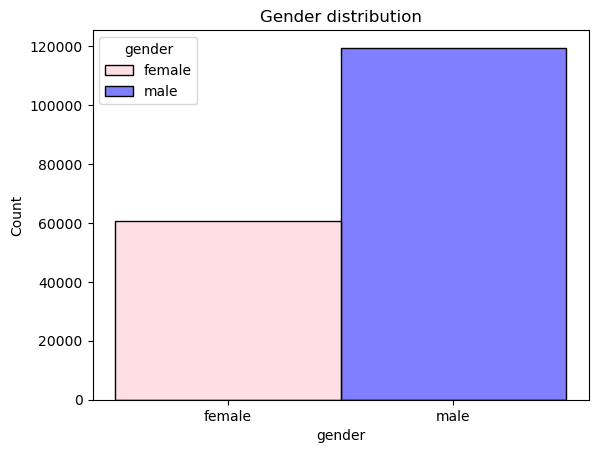

In [119]:
ax = sns.histplot(df, x="gender", hue="gender", palette=c_gender)
ax.set_title("Gender distribution")

### Profession

Text(0.5, 1.0, 'Profession distribution')

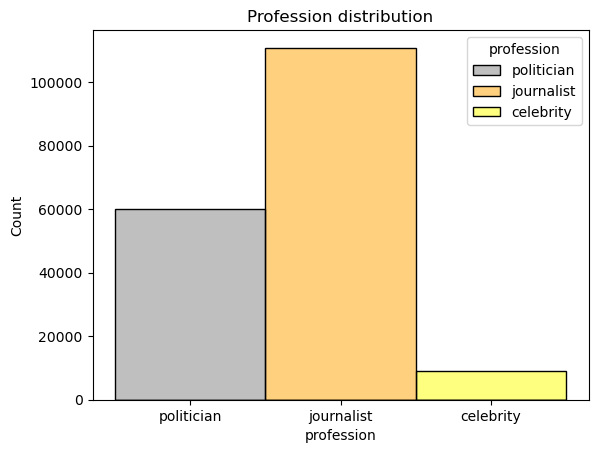

In [120]:
ax = sns.histplot(df, x="profession", hue="profession", palette=c_profession)
ax.set_title("Profession distribution")

### Ideology binary

Text(0.5, 1.0, 'Ideology binary distribution')

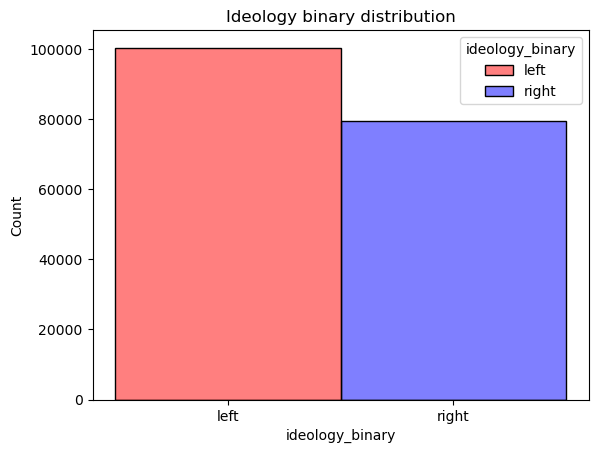

In [122]:
ax = sns.histplot(df, x="ideology_binary", hue="ideology_binary", palette=c_i_bin)
ax.set_title("Ideology binary distribution")

### Ideology multiclass

Text(0.5, 1.0, 'Ideology multiclass distribution')

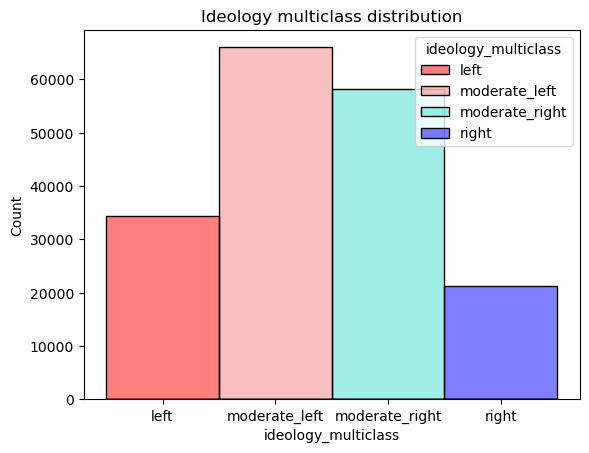

In [125]:
ax = sns.histplot(df, x="ideology_multiclass", hue="ideology_multiclass", palette=c_i_mul)
ax.set_title("Ideology multiclass distribution")

### Tweet

# Separación en train y test

In [126]:
# Separamos en training y en test
parte_test = 0.3
df_train, df_test = np.split(df, [int((1 - parte_test) * len(df))])

In [127]:
df_train

,label,gender,profession,ideology_binary,ideology_multiclass,tweet
0,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,¡Feliz 28 de febrero a todas las andaluzas y a...
1,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,"Feliz año nuevo, feliz esperanza 💕. Querido 20..."
2,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,🇩🇪🇪🇸 ¡Un placer encontrarme con mi homólogo al...
3,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,El conflicto en Ucrania ha supuesto una dramát...
4,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,La Academia de la Llingua Asturiana realiza un...
...,...,...,...,...,...,...
125994,b75a1185a34e920e0b23b9e87acde174,female,journalist,left,moderate_left,Pero qué cosa tan hermosa es este episodio sob...
125995,b75a1185a34e920e0b23b9e87acde174,female,journalist,left,moderate_left,@user vaya fichaje que han hecho estos maldito...
125996,b75a1185a34e920e0b23b9e87acde174,female,journalist,left,moderate_left,"Por si quedaban dudas, Lula ganó en el 'Ohio' ..."
125997,b75a1185a34e920e0b23b9e87acde174,female,journalist,left,moderate_left,Las ausencias de los máximos responsables polí...


In [128]:
df_test

,label,gender,profession,ideology_binary,ideology_multiclass,tweet
125999,b75a1185a34e920e0b23b9e87acde174,female,journalist,left,moderate_left,Qué petición tan simple la que hace la cantant...
126000,b764da399179ff2948719066391eaecf,female,journalist,right,moderate_right,"He ido a ver Cyrano de Bergerac, de la compañí..."
126001,b764da399179ff2948719066391eaecf,female,journalist,right,moderate_right,Brutal esta entrevista de ⁦@user ⁩ a a una ucr...
126002,b764da399179ff2948719066391eaecf,female,journalist,right,moderate_right,"Cuando llegué a Madrid, mi compañera de piso d..."
126003,b764da399179ff2948719066391eaecf,female,journalist,right,moderate_right,4/ Mientras algunos quieren presentar a Shakir...
...,...,...,...,...,...,...
179995,ffd89e81d6f6c783bfb72a4590db4304,male,politician,left,left,Desde un inicio nos opusimos a la escalda mili...
179996,ffd89e81d6f6c783bfb72a4590db4304,male,politician,left,left,En menos de 4 minutos he tratado de analizar e...
179997,ffd89e81d6f6c783bfb72a4590db4304,male,politician,left,left,Un fantasma recorre Euskal Herria y el Estado....
179998,ffd89e81d6f6c783bfb72a4590db4304,male,politician,left,left,Aquí os dejo mis reflexiones hoy en el diario ...
